#ICP 8 Q2

##Breast Cancer dataset

Import Dependencies and Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Import our datafile and read it into a Pandas dataframe

In [2]:
dataset = pd.read_csv("/content/Breast Cancer.csv")

## Data Exploration

Read the dataset. We can see that it reads in an extra row at the end filled with NaNs. We will take care of this problem when we train-test split

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Get statistics of our dataset

In [4]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Get info of our dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# get numpy ndarray
dataset = dataset.values

In [7]:
dataset.shape

(569, 33)

## Data Preprocessing

Create a StandardScalar object to standardize the data

In [8]:
# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()

For the breast cancer dataset, we have to change what we consider the x and y columns. The first column is irrelavent, the second column is our Y column, and the rest of the data are our x columns. 

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,2:32], dataset[:,1], test_size=0.25, random_state=42)

Get the data as float type

In [10]:
X_test = X_test.astype('float32')
X_train = X_train.astype('float32')

We need to get our labels in the form of 0 or 1 because we have an output layer that is a sigmoid activation

In [11]:
Y_train = np.where(Y_train=='B', 0, 1)
Y_test = np.where(Y_test=='B', 0, 1)

Before we standardize the data, let's create a copy so that we can compare later on

In [12]:
X_train_raw = X_train
X_test_raw = X_test

In [13]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Get the shape so that we can use it to input into our model

In [14]:
print(X_train.shape)

(426, 30)


## Model Creation (Benchmark with raw data)

Loss: 0.15

Accuracy: 94.41%

Create a Sequential Fully Connected Neural Network with the raw data

In [15]:
model = keras.Sequential() # create model

# input dimensions are 30 from above.
model.add(layers.Dense(32, input_dim=30, activation='relu')) # Input layer

model.add(layers.Dense(64, activation='relu')) # hidden layer

model.add(layers.Dense(1, activation='sigmoid')) # output layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,169
Trainable params: 3,169
Non-trainable params: 0
_________________________________________________________________


In [16]:
my_first_nn_fitted = model.fit(X_train_raw, Y_train, epochs=100, validation_data=(X_test_raw, Y_test))

Epoch 1/100
14/14 [==============================] - 3s 17ms/step - loss: 10.5678 - acc: 0.4319 - val_loss: 4.8930 - val_acc: 0.6434
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 1.9938 - acc: 0.6174 - val_loss: 0.2966 - val_acc: 0.9161
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6934 - acc: 0.8286 - val_loss: 0.5479 - val_acc: 0.9231
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5214 - acc: 0.8638 - val_loss: 0.2409 - val_acc: 0.9301
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4187 - acc: 0.9061 - val_loss: 0.1681 - val_acc: 0.9371
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3673 - acc: 0.8967 - val_loss: 0.2076 - val_acc: 0.9371
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3425 - acc: 0.9061 - val_loss: 0.1592 - val_acc: 0.9371
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3095 -

Get the scores for this model. The benchmark model has an accuracy of 94.4%

In [17]:
scores = model.evaluate(X_test_raw, Y_test)
print('Loss: {:.2}\nAccuracy: {:.2%}'.format(scores[0], scores[1]))

5/5 [==============================] - 0s 3ms/step - loss: 0.0928 - acc: 0.9720
Loss: 0.093
Accuracy: 97.20%


Plot the accuracy using the history method for the Keras model

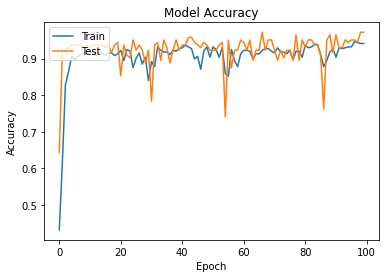

In [18]:
# summarize history for accuracy
plt.plot(my_first_nn_fitted.history['acc'])
plt.plot(my_first_nn_fitted.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Plot the accuracy using the history method for the Keras model

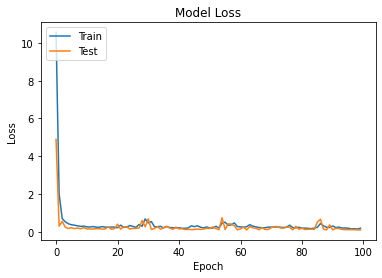

In [19]:
# summarize history for loss
plt.plot(my_first_nn_fitted.history['loss'])
plt.plot(my_first_nn_fitted.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model Creation (Normalized Data)

Loss: 0.15

Accuracy: 97.90%

In this model, we will use the normalized data and see what difference that makes

In [20]:
model = keras.Sequential() # create model

# input dimensions are 30 from above.
model.add(layers.Dense(32, input_dim=30, activation='relu')) # Input layer

model.add(layers.Dense(64, activation='relu')) # hidden layer

model.add(layers.Dense(1, activation='sigmoid')) # output layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                992       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,169
Trainable params: 3,169
Non-trainable params: 0
_________________________________________________________________


In [21]:
my_first_nn_fitted_normal = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
14/14 [==============================] - 1s 13ms/step - loss: 0.5421 - acc: 0.7934 - val_loss: 0.3766 - val_acc: 0.9231
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3369 - acc: 0.9178 - val_loss: 0.2288 - val_acc: 0.9441
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2271 - acc: 0.9413 - val_loss: 0.1514 - val_acc: 0.9580
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1682 - acc: 0.9577 - val_loss: 0.1108 - val_acc: 0.9650
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1307 - acc: 0.9695 - val_loss: 0.0896 - val_acc: 0.9650
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.1078 - acc: 0.9765 - val_loss: 0.0772 - val_acc: 0.9720
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0914 - acc: 0.9812 - val_loss: 0.0707 - val_acc: 0.9720
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0796 - 

Get the scores for this model. The benchmark model has an accuracy of 97.9%

In [22]:
scores = model.evaluate(X_test, Y_test)
print('Loss: {:.2}\nAccuracy: {:.2%}'.format(scores[0], scores[1]))

5/5 [==============================] - 0s 3ms/step - loss: 0.1310 - acc: 0.9860
Loss: 0.13
Accuracy: 98.60%


Plot the accuracy using the history method for the Keras model

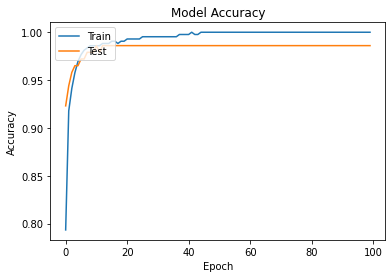

In [23]:
# summarize history for accuracy
plt.plot(my_first_nn_fitted_normal.history['acc'])
plt.plot(my_first_nn_fitted_normal.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Plot the accuracy using the history method for the Keras model

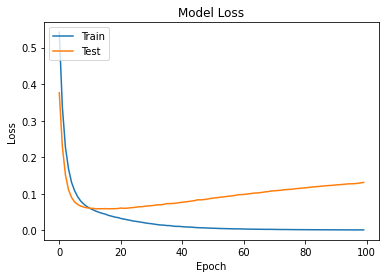

In [24]:
# summarize history for loss
plt.plot(my_first_nn_fitted_normal.history['loss'])
plt.plot(my_first_nn_fitted_normal.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model Creation (Normalized Data and Extra Dense Layers)

Loss: 0.18

Accuracy: 98.60%

This model will use the normalized data and extra dense layers

In [25]:
model = keras.Sequential() # create model

# input dimensions are 30 from above.
model.add(layers.Dense(32, input_dim=30, activation='relu')) # Input layer

model.add(layers.Dense(64, activation='relu')) # hidden layer

model.add(layers.Dense(128, activation='relu')) # hidden layer

model.add(layers.Dense(64, activation='relu')) # hidden layer

model.add(layers.Dense(1, activation='sigmoid')) # output layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                992       
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 19,745
Trainable params: 19,745
Non-trainable params: 0
_________________________________________________________________


In [26]:
my_first_nn_fitted_dense = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
14/14 [==============================] - 1s 15ms/step - loss: 0.4699 - acc: 0.8756 - val_loss: 0.2348 - val_acc: 0.9580
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2003 - acc: 0.9366 - val_loss: 0.0980 - val_acc: 0.9650
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1124 - acc: 0.9624 - val_loss: 0.0692 - val_acc: 0.9720
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0902 - acc: 0.9695 - val_loss: 0.0671 - val_acc: 0.9790
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0686 - acc: 0.9789 - val_loss: 0.0618 - val_acc: 0.9790
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0559 - acc: 0.9836 - val_loss: 0.0604 - val_acc: 0.9790
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0489 - acc: 0.9859 - val_loss: 0.0636 - val_acc: 0.9720
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0442 - 

Get the scores for this model. The dense model has an accuracy of 98.6%

In [27]:
scores = model.evaluate(X_test, Y_test)
print('Loss: {:.2}\nAccuracy: {:.2%}'.format(scores[0], scores[1]))

5/5 [==============================] - 0s 3ms/step - loss: 0.1691 - acc: 0.9860
Loss: 0.17
Accuracy: 98.60%


Plot the accuracy using the history method for the Keras model

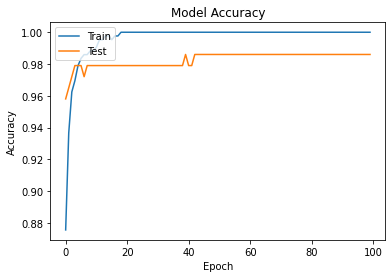

In [28]:
# summarize history for accuracy
plt.plot(my_first_nn_fitted_dense.history['acc'])
plt.plot(my_first_nn_fitted_dense.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Plot the accuracy using the history method for the Keras model

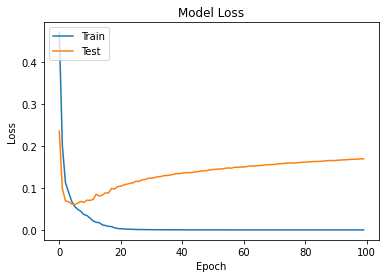

In [29]:
# summarize history for loss
plt.plot(my_first_nn_fitted_dense.history['loss'])
plt.plot(my_first_nn_fitted_dense.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()